<a href="https://colab.research.google.com/github/deep-bits/PA/blob/main/EDA_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read and Merge

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy.stats as st
import plotly.express as px 
test = pd.read_csv('https://raw.githubusercontent.com/Bits-Deep-Analytics/Predictive_analytics/dev/Data/Telecom_churn/churn-bigml-20.csv')
train = pd.read_csv('https://raw.githubusercontent.com/Bits-Deep-Analytics/Predictive_analytics/dev/Data/Telecom_churn/churn-bigml-80.csv')
complete = [train, test]
data = pd.concat(complete)
data.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


# Draw diagrams

In [3]:
ct_ci_ch = pd.crosstab(data['International plan'],data['Churn'])
ct_ci_ip = pd.crosstab(data['Churn'],data['International plan'])
print(ct_ci_ch,"\n")
ct_ci_m = pd.crosstab(data['Churn'], data['International plan'], margins = True)
print(ct_ci_m)

Churn               False  True
International plan             
No                   2664   346
Yes                   186   137 

International plan    No  Yes   All
Churn                              
False               2664  186  2850
True                 346  137   483
All                 3010  323  3333


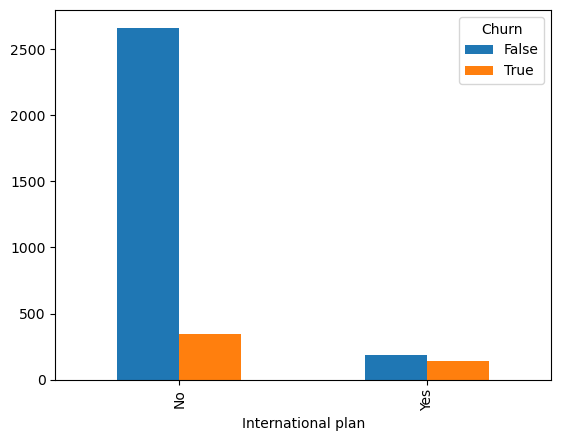

In [4]:
ct_ci_ch.plot(kind = 'bar', stacked = False)
plt.show()

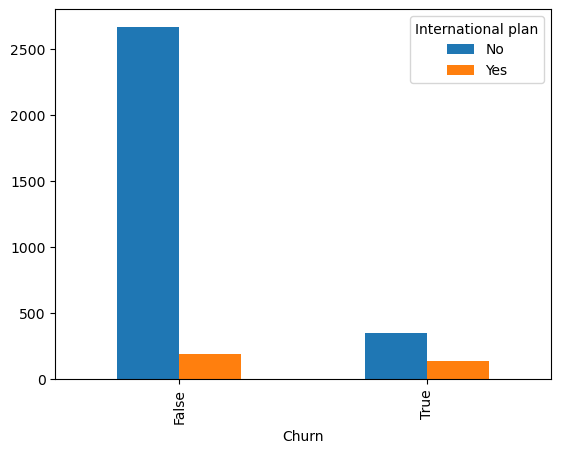

In [5]:
ct_ci_ip.plot(kind = 'bar', stacked = False)
plt.show()

In [6]:
ct_ci_nr = pd.crosstab(data['International plan'],data['Churn'], 
                       normalize = 'columns')
ct_ci_nr = ct_ci_nr
print(ct_ci_nr.transpose(),"\n")
ct_ci_nc = pd.crosstab(data['Churn'], data['International plan'], 
                       normalize = 'columns')
ct_ci_nc = ct_ci_nc
print(ct_ci_nc)

International plan        No       Yes
Churn                                 
False               0.934737  0.065263
True                0.716356  0.283644 

International plan       No       Yes
Churn                                
False               0.88505  0.575851
True                0.11495  0.424149


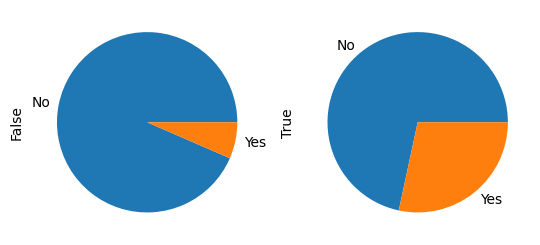

In [7]:
ct_ci_nr.plot(kind = 'pie', subplots = True, legend = False)
plt.show()

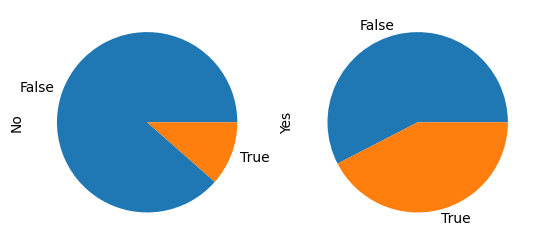

In [8]:
ct_ci_nc.plot(kind = 'pie', subplots = True, legend = False)
plt.show()

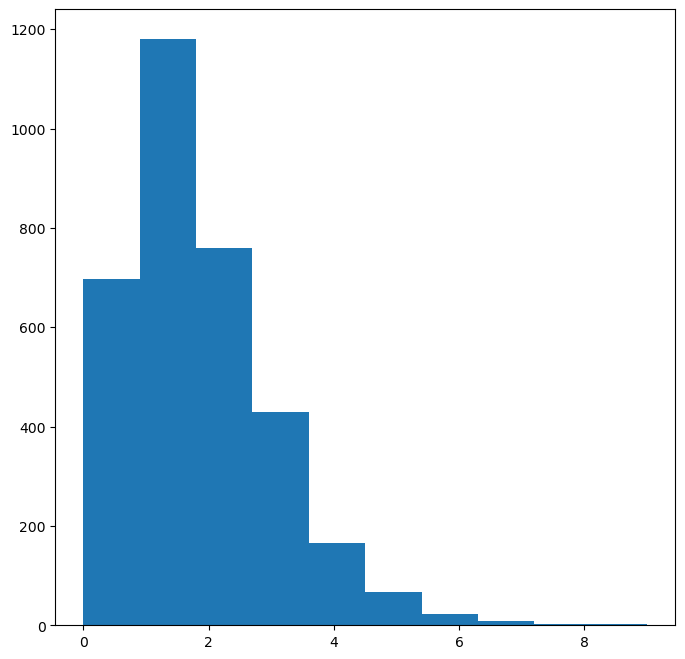

In [9]:
plt.figure(figsize=(8, 8))
plt.hist(data['Customer service calls'])
plt.show()

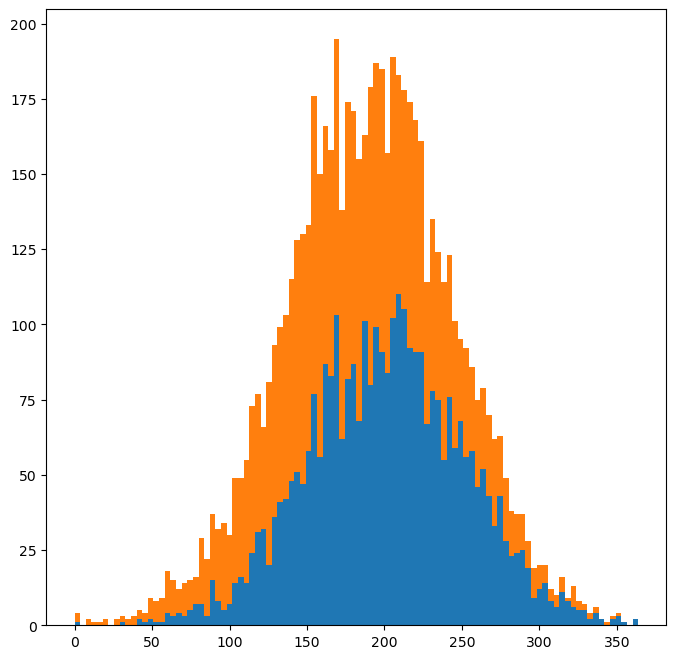

In [10]:
plt.figure(figsize=(8, 8))
plt.hist([data['Total eve minutes'], data['Total day minutes']], bins = 100, 
         stacked=True, density=False)
plt.show()

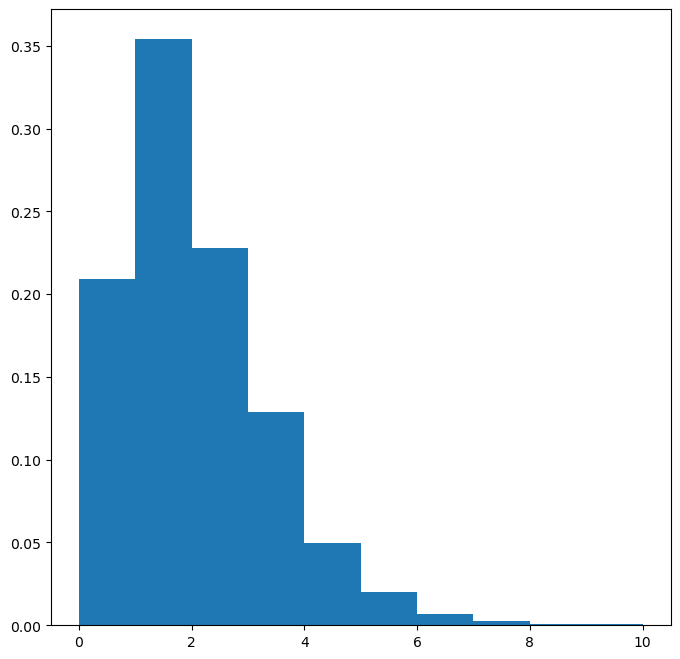

In [11]:
(counts, bins) = np.histogram(data['Customer service calls'], bins=range(11))
factor = 1/sum(counts)
plt.figure(figsize=(8, 8))
plt.hist(bins[:-1], bins, weights=factor*counts)
plt.show()

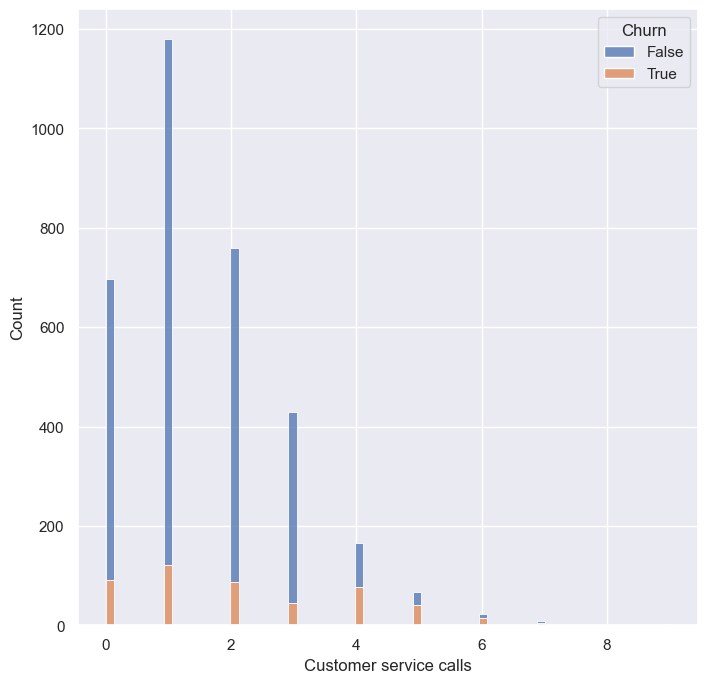

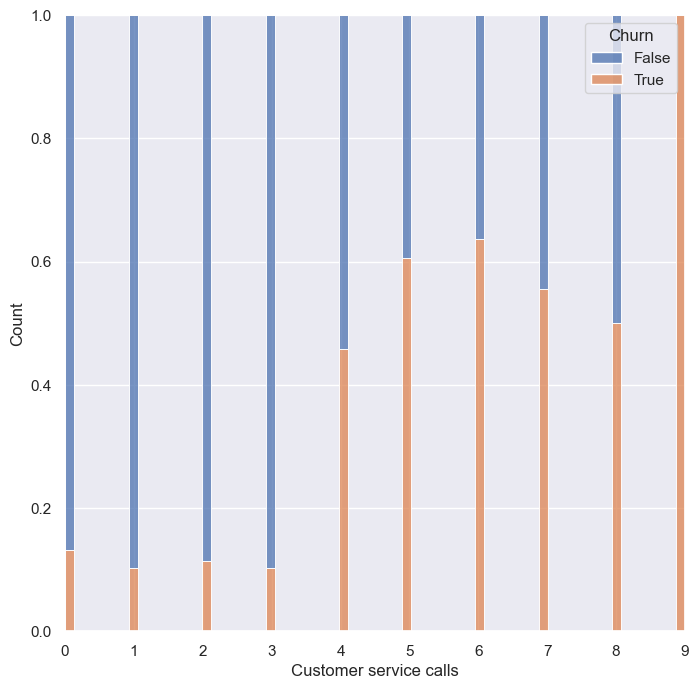

In [15]:
data = data.reset_index()
sns.set(rc={"figure.figsize":(8, 8)})
sns.histplot(data, x=data['Customer service calls'], hue=data['Churn'], 
             multiple="stack", legend = True)
plt.show()
sns.histplot(data, x=data['Customer service calls'], hue=data['Churn'], 
             multiple="fill", legend = True) 
plt.show()

In [ ]:
churners = data[data['Churn'] == True]
non_churners = data[data['Churn'] == False]
c_ic = churners['Total intl calls']
nc_ic = non_churners['Total intl calls']
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(c_ic, nc_ic)
print("T-statistic value: ", t_stat)
print("P-Value: ", p_value)

In [ ]:
sns.set(rc={"figure.figsize":(8, 8)})
g = sns.scatterplot(x = data['Total eve minutes'], y = data['Total day minutes'],
                   hue = data['Churn'], s = 15);

In [ ]:
sns.set(rc={"figure.figsize":(8, 8)})
g =sns.scatterplot(x=data['Total day minutes'], y=data['Customer service calls'],
                   hue=data['Churn'], s = 15);

In [ ]:
px.scatter_matrix(data.iloc[:, [6,7,8]],width=550, height=450)

In [ ]:
mins = data['Total day minutes']
calls = data['Total day calls']
charge = data['Total day charge']

print(st.pearsonr(mins,calls))
print(st.pearsonr(mins,charge))
print(st.pearsonr(calls,charge))

In [ ]:
model = LinearRegression()
x = data['Total day minutes']
y = data['Total eve minutes']

slope, intercept, r, p, std_err = st.linregress(x, y)
x = np.array(x).reshape((-1, 1))
y = np.array(y)
model.fit(x, y)
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")
y_pred = model.predict([[5]])
print(f"predicted response:\n{y_pred}")

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))
plt.figure(figsize=(8, 8))
plt.scatter(x, y, s = 5)
plt.plot(x, mymodel)
plt.show()
